# Import Libraries

In [10]:
import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
import imageio
import matplotlib.pyplot as plt

# Utils

In [49]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def fig(*imgs):
    """color mode: 'gray' or None"""
    num_imgs = len(imgs)
    if num_imgs>2:
        _, axs = plt.subplots(num_imgs, 1)
        for i in range(num_imgs):
            axs[i].imshow(imgs[i]);axs[i].set_axis(False)
    else:
        plt.imshow(imgs[0], 'gray');plt.axis(False)    

def load_data(path):
    train_x = sorted(glob(os.path.join(path, "training", "images", "*.tif")))
    train_y = sorted(glob(os.path.join(path, "training", "1st_manual", "*.gif")))

    test_x = sorted(glob(os.path.join(path, "test", "images", "*.tif")))
    test_y = sorted(glob(os.path.join(path, "test", "1st_manual", "*.gif")))

    return (train_x, train_y), (test_x, test_y)

def crop_patches(images, masks, save_path, patch_size, index=0):

    img = torchvision.io.read_image('').permute(1, 2, 0)

    H, W, C = img.shape

    patch_width = 125
    n_rows = H // patch_width
    n_cols = W // patch_width

    cropped_img = img[:n_rows * patch_width, :n_cols * patch_width, :]

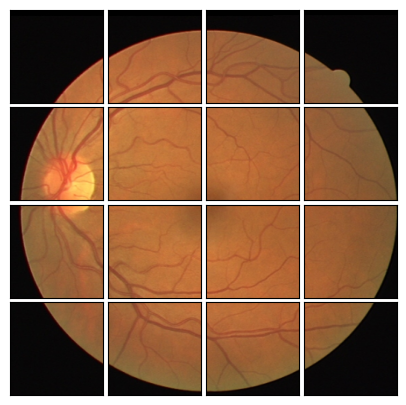

In [72]:
import torchvision, torch

img = torchvision.io.read_image('data/augmented_data/test/image/01_test_0.png').permute(1, 2, 0)

H, W, C = img.shape

patch_width = 125
n_rows = H // patch_width
n_cols = W // patch_width

cropped_img = img[:n_rows * patch_width, :n_cols * patch_width, :]
#
# Into patches
# [n_rows, n_cols, patch_width, patch_width, C]
#
patches = torch.empty(n_rows, n_cols, patch_width, patch_width, C)
for chan in range(C):
    patches[..., chan] = (
        cropped_img[..., chan]
        .reshape(n_rows, patch_width, n_cols, patch_width)
        .permute(0, 2, 1, 3)
    )
    
#
#Plot
#
f, axs = plt.subplots(n_rows, n_cols, figsize=(5, 5))

for row_idx in range(n_rows):
    for col_idx in range(n_cols):
        axs[row_idx, col_idx].imshow(patches[row_idx, col_idx, ...] / 255)

for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
f.subplots_adjust(wspace=0.05, hspace=0.05)

In [81]:
patches = np.array(patches).astype("uint8")

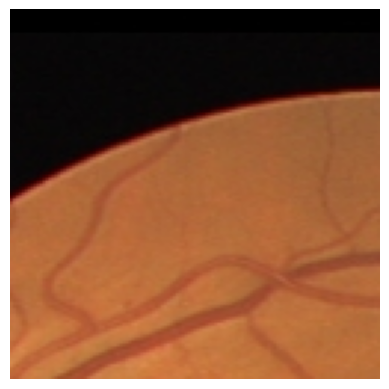

In [84]:
fig(patches[0,1])

In [ ]:
patches